#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

from plotly.offline import init_notebook_mode, plot, iplot

from wordcloud import WordCloud, STOPWORDS

from collections import Counter

#Loading The Dataframe

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/DAV/zomato_modified.xlsx")

#Examining the Dataframe

1. In all, there are 9551 rows with 21 parameters.

2. We can see that there is only one column, that is, the cuisine colomn which has null values.

3. The info() function gives us an idea of the number of features of each type.  We can note that there are 14 features of object type and the rest are of nuberical type (int/float).



In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,Phillipines,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Phillipines,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Phillipines,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,Phillipines,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Phillipines,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country               9551 non-null   object 
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#Exploring Categorical Variables

1. Every object type feature is not a categorical variable, although there are quite a few which might possibly be.

2. As we can see, the column _'Switch to order menu'_ has all entries to be No. Hence we are sure that we will not need it for any further use.

3. The pie-chart visualization for the other binary variables tells us about their overall spread.

4. Since there are 141 cities, we will observe the top 15.

In [ ]:
print(df.loc[:,df.dtypes==object].columns)

Index(['Restaurant Name', 'Country', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Rating color', 'Rating text'],
      dtype='object')


In [ ]:
df['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

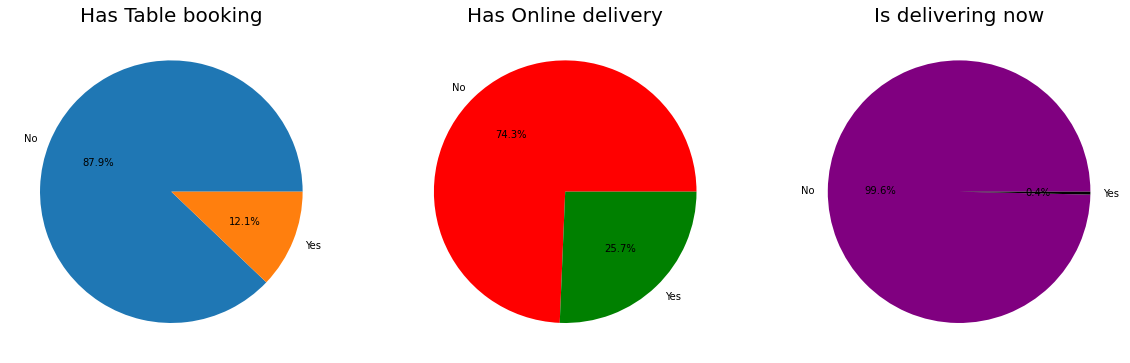

In [ ]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3)

fig.set_size_inches(20,20)

ax1.set_title("Has Table booking",size=20)
ax1.pie(df['Has Table booking'].value_counts(),labels=df['Has Table booking'].value_counts().index,autopct="%1.1f%%");

ax2.set_title("Has Online delivery",size=20)
ax2.pie(df['Has Online delivery'].value_counts(),labels=df['Has Online delivery'].value_counts().index,autopct="%1.1f%%",colors=['r','g']);

ax3.set_title("Is delivering now",size=20)
ax3.pie(df['Is delivering now'].value_counts(),labels=df['Is delivering now'].value_counts().index,autopct="%1.1f%%",colors=['purple','black']);

## The plots below give us an idea of the coutries and currencies that are mentioned in the data set. In all we have 15 countries and 12 currencies, suggesting currency overlap.

Text(0.5, 1.0, 'Number of restaurants and their currencies')

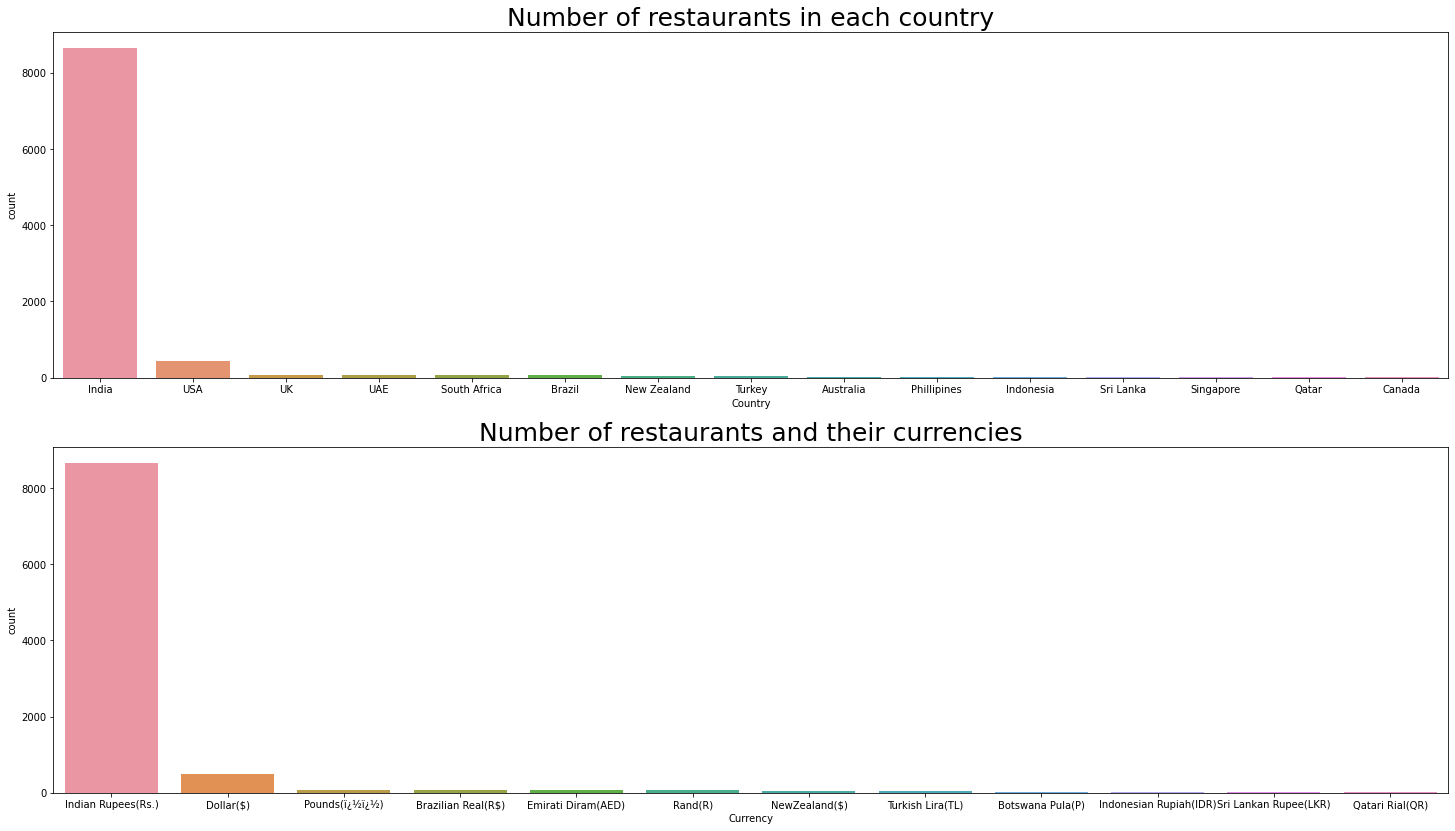

In [ ]:
fig1, (ax1_1,ax1_2)=plt.subplots(2,1)
fig1.set_size_inches(25,14)

sns.countplot(data=df,x='Country',ax=ax1_1,order = df['Country'].value_counts().index)
ax1_1.set_title("Number of restaurants in each country",size=25)

sns.countplot(data=df,x='Currency',ax=ax1_2,order = df['Currency'].value_counts().index)
ax1_2.set_title("Number of restaurants and their currencies",size=25)

## Country Wise distibution of zomato outlets using a pie-chart

In [ ]:


labels = list(df.Country.value_counts().index)
values = list(df.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

### Below, we can see that Singapore, USA, Austrailia and Canada are considered to have the same currency in this dataset.

In [ ]:
countryCurrency=df[['Country','Currency']]
countryCurrency=countryCurrency.drop_duplicates(keep='last')
countryCurrency=countryCurrency.reset_index(drop=True) 
countryCurrency

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Singapore,Dollar($)
3,Australia,Dollar($)
4,USA,Dollar($)
5,Canada,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


In [ ]:
no_of_cities=len(df['City'].value_counts().index)
print(f'Total number of different cities: {no_of_cities}')


Total number of different cities: 141


### All the top 10 cities are from India and the top 4 cities have the major share of the restaurants. In all we are looking at the top 15 cities below.

Text(0, 0.5, 'Count')

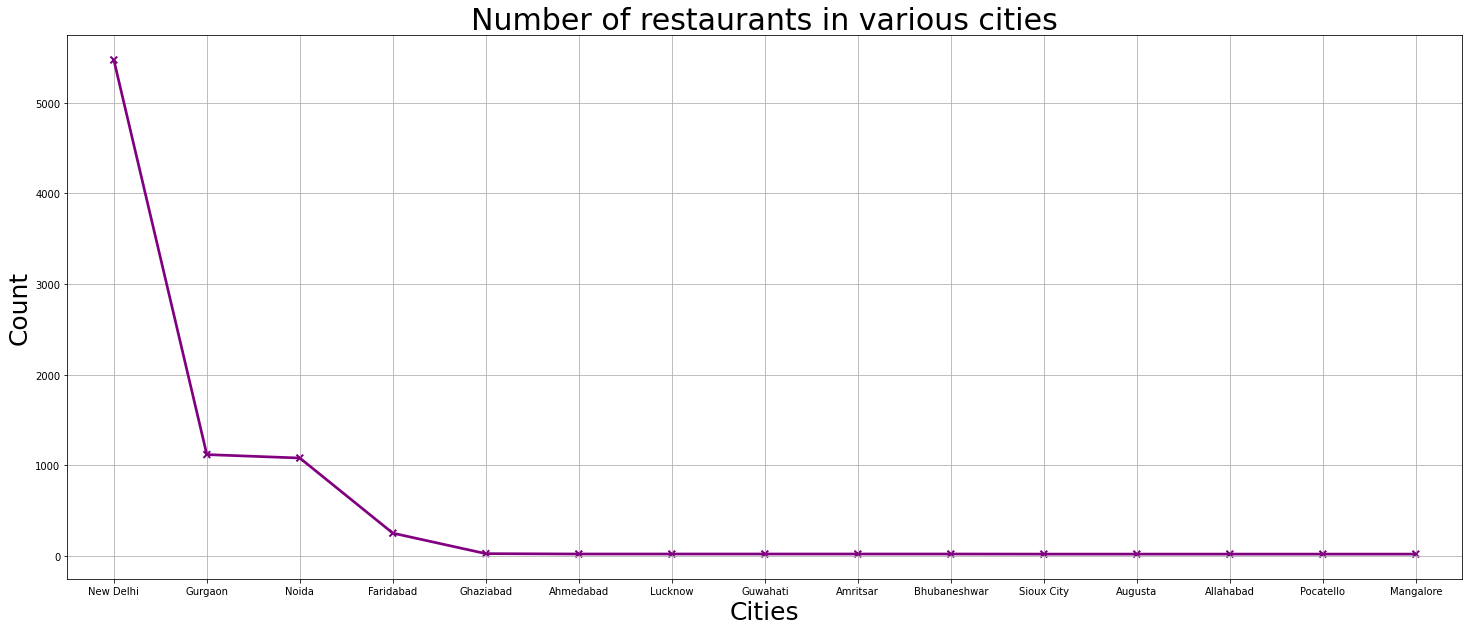

In [ ]:
fig7,ax7_1=plt.subplots(1,1)

fig7.set_size_inches(25,10)

sns.pointplot(ax=ax7_1,x=df['City'].value_counts().head(15).index,y=df['City'].value_counts().head(15),color="purple",markers='x')
ax7_1.grid(True)
ax7_1.set_title("Number of restaurants in various cities", size=30)
ax7_1.set_xlabel("Cities", size=25)
ax7_1.set_ylabel("Count", size=25)

## An attempt to check if there are food chains, prompted me to plot a wordcloud and indeed there are quite a few chains like McDonald's, Domino's Pizza, etc.

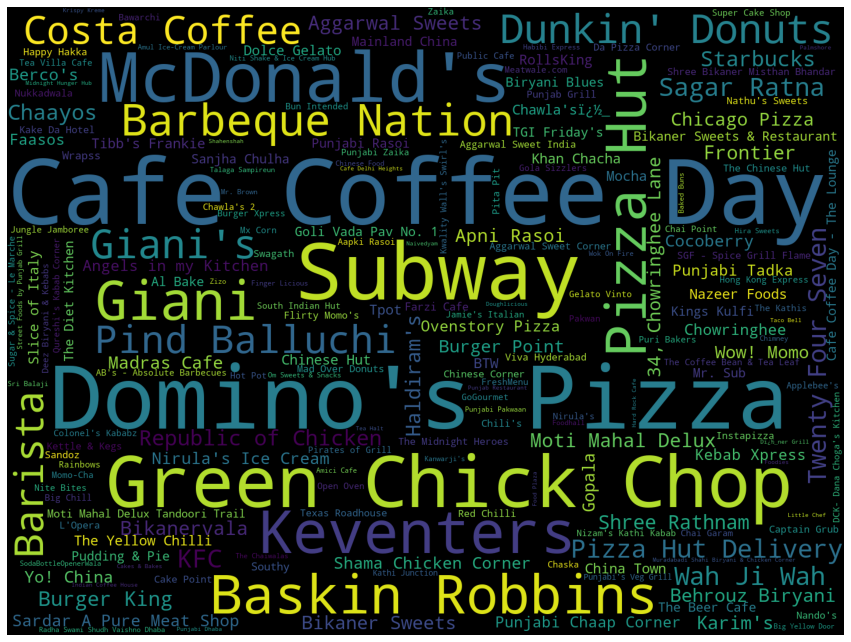

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5, stopwords=stopwords).generate_from_frequencies(df['Restaurant Name'].value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Top 15 food chains

In [ ]:
df['Restaurant Name'].value_counts().head(15)

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Dunkin' Donuts      22
Barista             22
Giani's             22
Costa Coffee        20
Pind Balluchi       20
Name: Restaurant Name, dtype: int64

Text(0.5, 1.0, 'Most dominant food chains')

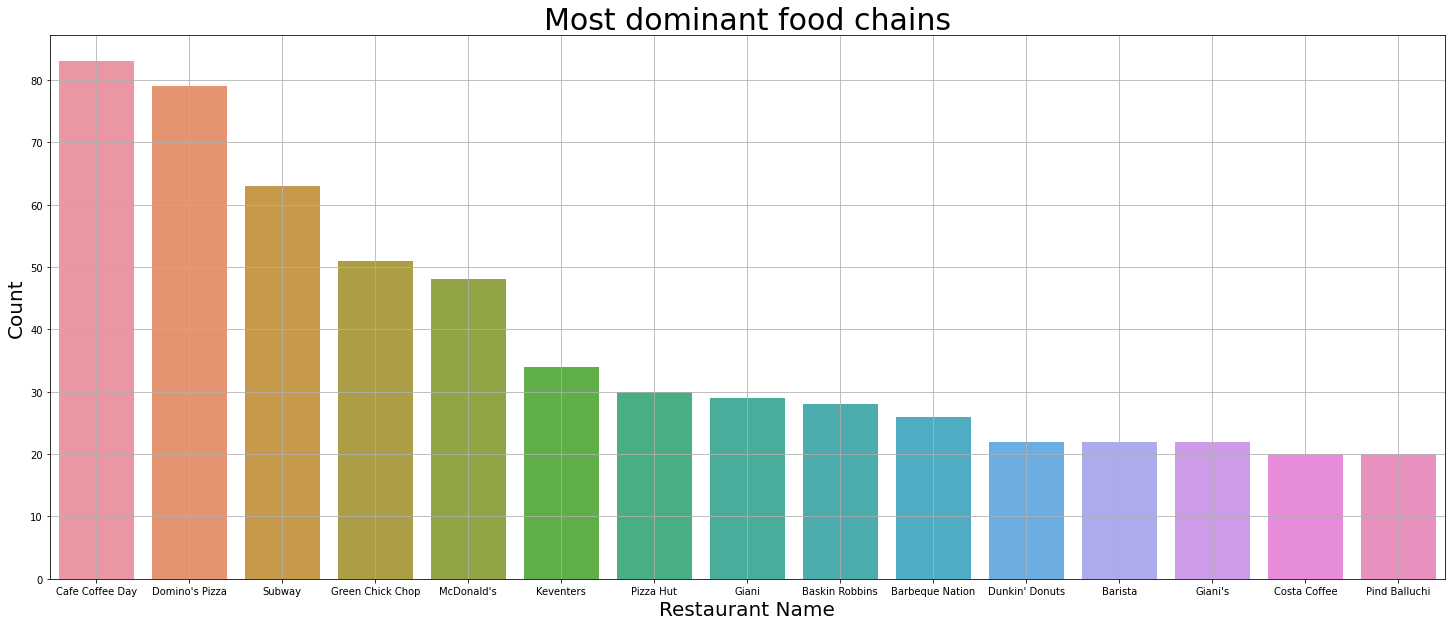

In [ ]:
fig8,ax8_1=plt.subplots(1,1)

fig8.set_size_inches(25,10)

sns.barplot(ax=ax8_1,x=df['Restaurant Name'].value_counts().head(15).index,y=df['Restaurant Name'].value_counts().head(15))
ax8_1.grid(True)
ax8_1.set_xlabel("Restaurant Name",size=20)
ax8_1.set_ylabel("Count",size=20)
ax8_1.set_title("Most dominant food chains", size=30)

## Rating Analysis

1. We can see that a lot of restaurants are not rated.
2. The ones that are rated follow a nearly normal distribution. The plot is a clear indicator of this. Also, we can not that the mean and median are very close.

Text(0.5, 1.0, 'Rating')

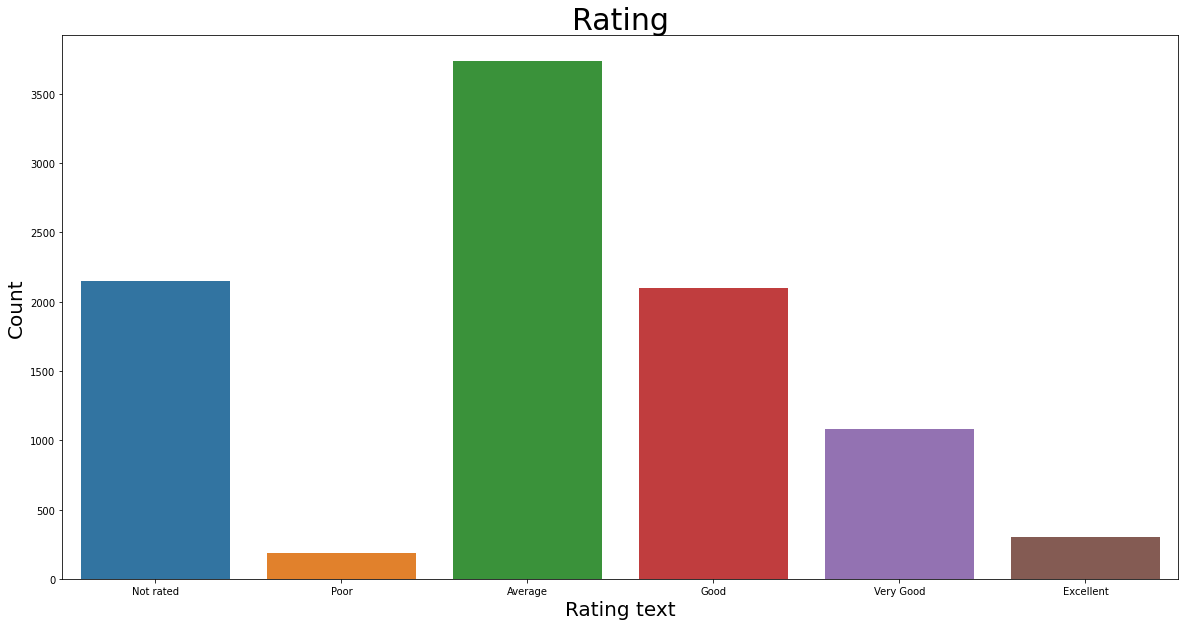

In [ ]:
fig9,ax9_1=plt.subplots(1,1)

fig9.set_size_inches(20,10)

sns.countplot(ax=ax9_1,data=df.sort_values(by=['Aggregate rating']),x='Rating text')
#ax9_1.grid(True)
ax9_1.set_xlabel("Rating text",size=20)
ax9_1.set_ylabel("Count",size=20)
ax9_1.set_title("Rating", size=30)

3.4400243144671108
3.4
0.5521947557831588


Text(0.5, 1.0, 'Rating distribution')

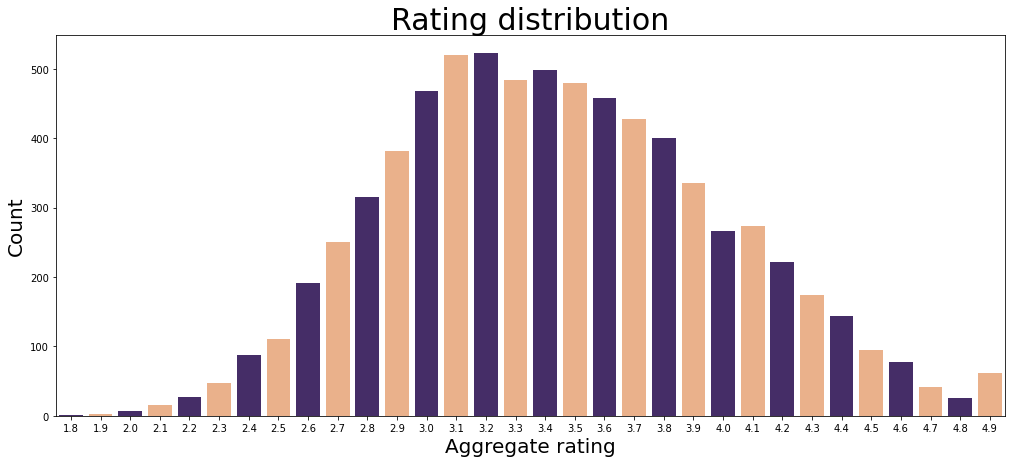

In [ ]:
df_rated=df[df['Aggregate rating']!=0]
fig9, ax9_1=plt.subplots(figsize=(17,7))
sns.countplot(data=df_rated,x="Aggregate rating",palette=['#432371',"#FAAE7B"])
print(df_rated['Aggregate rating'].mean())
print(df_rated['Aggregate rating'].median())
print(df_rated['Aggregate rating'].std())

ax9_1.set_xlabel("Aggregate rating",size=20)
ax9_1.set_ylabel("Count",size=20)
ax9_1.set_title("Rating distribution", size=30)

# Analysis of Zomato's Indian partners

1. Since a lot of the data(90%+) is from India, it will be better to analyse the data according to an indian perspective.

2. We see that no columns have any null value in this data frame.

In [ ]:
dfIndia=df.loc[df['Country']=='India']

In [ ]:
dfIndia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8652 entries, 624 to 9275
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   Country               8652 non-null   object 
 3   City                  8652 non-null   object 
 4   Address               8652 non-null   object 
 5   Locality              8652 non-null   object 
 6   Locality Verbose      8652 non-null   object 
 7   Longitude             8652 non-null   float64
 8   Latitude              8652 non-null   float64
 9   Cuisines              8652 non-null   object 
 10  Average Cost for two  8652 non-null   int64  
 11  Currency              8652 non-null   object 
 12  Has Table booking     8652 non-null   object 
 13  Has Online delivery   8652 non-null   object 
 14  Is delivering now     8652 non-null   object 
 15  Switch to order men

## Exploring the key cities, the ones with the max restaurents 
1. Out of the 43 different cities in India, we have 91% of the eataries in 4 cities of India. These Include the cities of New Delhi and it's neighbours- Gurgaon, Noida and Faridabad,

 

In [ ]:
print(dfIndia.City.value_counts().size)
print()
print(dfIndia.City.value_counts())
print()
print((dfIndia.City.value_counts()[:4]/len(dfIndia)).sum()*100)

43

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Amritsar          21
Lucknow           21
Guwahati          21
Bhubaneshwar      21
Mysore            20
Kochi             20
Puducherry        20
Kanpur            20
Goa               20
Mumbai            20
Vadodara          20
Surat             20
Coimbatore        20
Vizag             20
Ranchi            20
Nashik            20
Chennai           20
Bhopal            20
Dehradun          20
Jaipur            20
Patna             20
Varanasi          20
Nagpur            20
Agra              20
Ludhiana          20
Mangalore         20
Allahabad         20
Bangalore         20
Aurangabad        20
Kolkata           20
Pune              20
Indore            20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Mohali             1
Panchkula          1
Name: City, dtype: int64

91.56264447526583


Text(0, 0.5, 'Count')

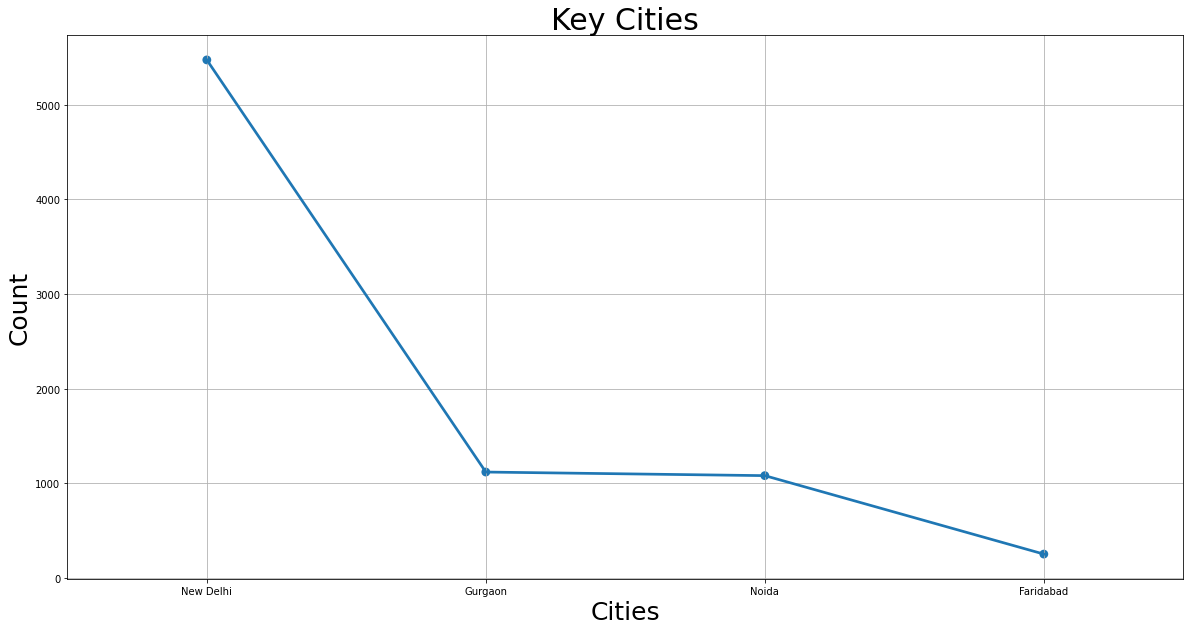

In [ ]:
fig10=plt.figure(figsize=(20,10))
ax10=sns.pointplot(x=dfIndia.City.value_counts().index[:4],y=dfIndia.City.value_counts()[:4])
ax10.grid(True)
ax10.set_title("Key Cities",size=30)
ax10.set_xlabel("Cities",size=25)
ax10.set_ylabel("Count",size=25)

In [ ]:
dfKeyCities=df[(df['City']=="New Delhi")| (df['City']=="Gurgaon")| (df['City']=="Noida") | (df['City']=="Faridaba")]

# Question 1

1. We can see that 'Italian' is the 5th most popular Cuisine based on the number of restaurents offering it. 

2. We will look at all the top 5 cuisines for answering this question.

 

In [ ]:
df['Cuisines'] = df['Cuisines'].astype(str)
df['Total_Cuisines'] = df['Cuisines'].apply(lambda x: len(x.split(',')))


lst_cuisine = set()
Cnt_cuisine = Counter()
for cu_lst in df['Cuisines']:
    cu_lst = cu_lst.split(',')
    lst_cuisine.update([cu.strip() for cu in cu_lst])
    for cu in cu_lst:
        Cnt_cuisine[cu.strip()] += 1

cnt = pd.DataFrame.from_dict(Cnt_cuisine, orient = 'index')

cnt.sort_values(0, ascending = False, inplace = True)


In [ ]:
df.Total_Cuisines.value_counts()

2    3444
1    3403
3    1840
4     584
5     164
6      74
7      28
8      14
Name: Total_Cuisines, dtype: int64

In [ ]:
cnt.head(5)

,0
North Indian,3960
Chinese,2735
Fast Food,1986
Mughlai,995
Italian,764


In [ ]:
print(cnt.index[:5])

Index(['North Indian', 'Chinese', 'Fast Food', 'Mughlai', 'Italian'], dtype='object')


In [ ]:
dfCuisine=df.copy()
dfCuisine[['NI','Ch','FF','Mu','It']]=0

In [ ]:
dfCuisine.describe()

,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Total_Cuisines,NI,Ch,FF,Mu,It
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.0,9551.0,9551.0,9551.0
mean,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748,2.064601,0.0,0.0,0.0,0.0,0.0
std,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145,1.092724,0.0,0.0,0.0,0.0,0.0
min,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0
25%,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000,1.000000,0.0,0.0,0.0,0.0,0.0
50%,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000,2.000000,0.0,0.0,0.0,0.0,0.0
75%,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000,3.000000,0.0,0.0,0.0,0.0,0.0
max,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000,8.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
for index,row in dfCuisine.iterrows():
  
  list_=row['Cuisines'].replace(" ","")
  list_= list_.split(',')
  #print(list_)
  for x in range(len(list_)):
    #print(list_[x])
    if(list_[x]=='Italian' ):
      dfCuisine.at[index,'It']=1

    if(list_[x]=='NorthIndian'):
      dfCuisine.at[index,'NI']=1

    if(list_[x]=='Chinese'):
      dfCuisine.at[index,'Ch']=1

    if(list_[x]=='Mughlai'):
      dfCuisine.at[index,'Mu']=1

    if(list_[x]=='FastFood'):
      dfCuisine.at[index,'FF']=1

In [ ]:
dfIt=dfCuisine[dfCuisine['It']==1]
dfCh=dfCuisine[dfCuisine['Ch']==1]
dfFF=dfCuisine[dfCuisine['FF']==1]
dfMu=dfCuisine[dfCuisine['Mu']==1]
dfNI=dfCuisine[dfCuisine['NI']==1]

print(len(dfIt))
print(len(dfCh))
print(len(dfNI))
print(len(dfMu))
print(len(dfFF))

764
2733
3960
994
1986


## We can see that the all different countries do show variation in their rating distribution. The possible reason could be the offering of the quality of that cuisine in that country and also the preference of the people.

Text(0.5, 1.0, 'North Indian')

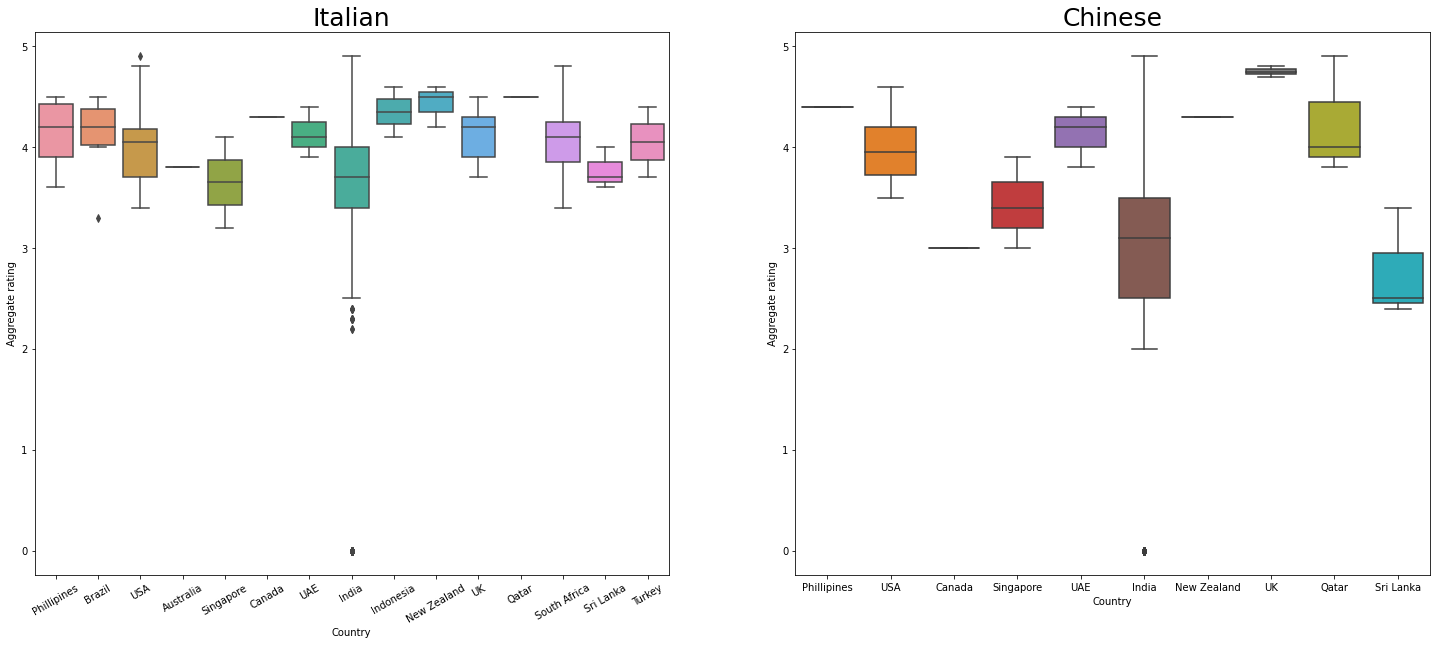

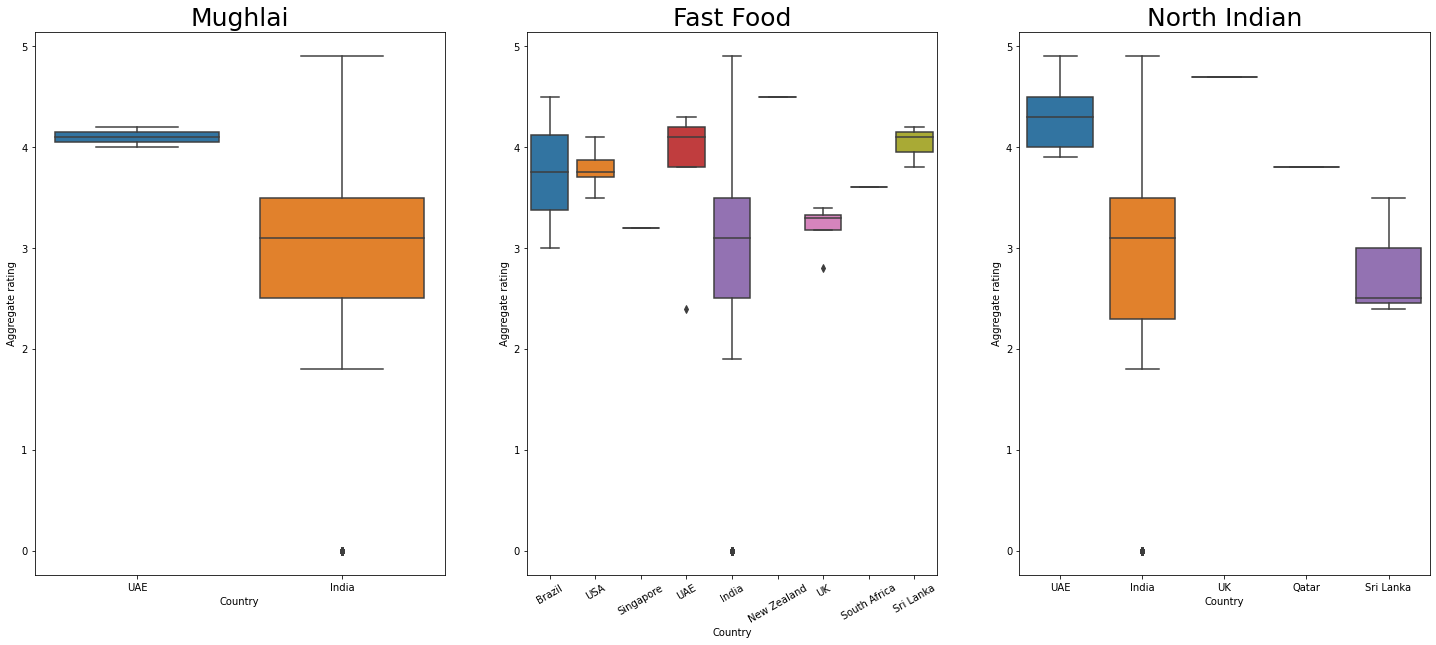

In [ ]:
fig2, (ax2_1,ax2_2)=plt.subplots(1,2)
fig2.set_size_inches(25,10)

sns.boxplot(data=dfIt,x='Country',y='Aggregate rating',ax=ax2_1)
ax2_1.set_xticklabels(ax2_1.get_xticklabels(),rotation=30)
ax2_1.set_title("Italian",size=25)

sns.boxplot(data=dfCh,x='Country',y='Aggregate rating',ax=ax2_2)
ax2_2.set_title("Chinese",size=25)


fig2, (ax2_3,ax2_4,ax2_5)=plt.subplots(1,3)
fig2.set_size_inches(25,10)

sns.boxplot(data=dfMu,x='Country',y='Aggregate rating',ax=ax2_3)
ax2_3.set_title("Mughlai",size=25)

sns.boxplot(data=dfFF,x='Country',y='Aggregate rating',ax=ax2_4)
ax2_4.set_xticklabels(ax2_4.get_xticklabels(),rotation=30)
ax2_4.set_title("Fast Food",size=25)

sns.boxplot(data=dfNI,x='Country',y='Aggregate rating',ax=ax2_5)
ax2_5.set_title("North Indian",size=25)

##The cost vs country box plot for the cuisines in a very bad indicator of the trend. This is because different countries have their own currency. Hence comparison among different countries wont' give much of a meaningful result unless the currencies are properly converted.

## A possible assumption can be that, this data will give us a good idea of the cuisines only for the Indian restaurants based on it's nature.  

Text(0.5, 1.0, 'North Indian')

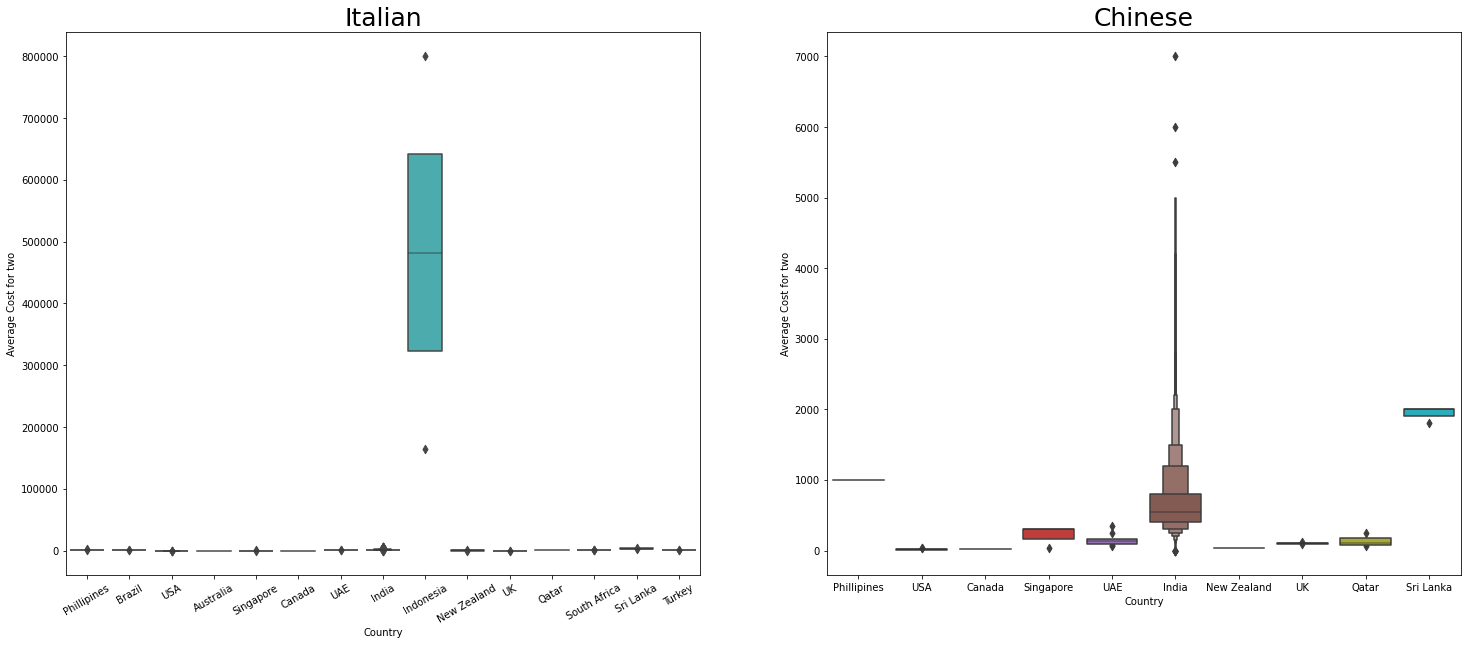

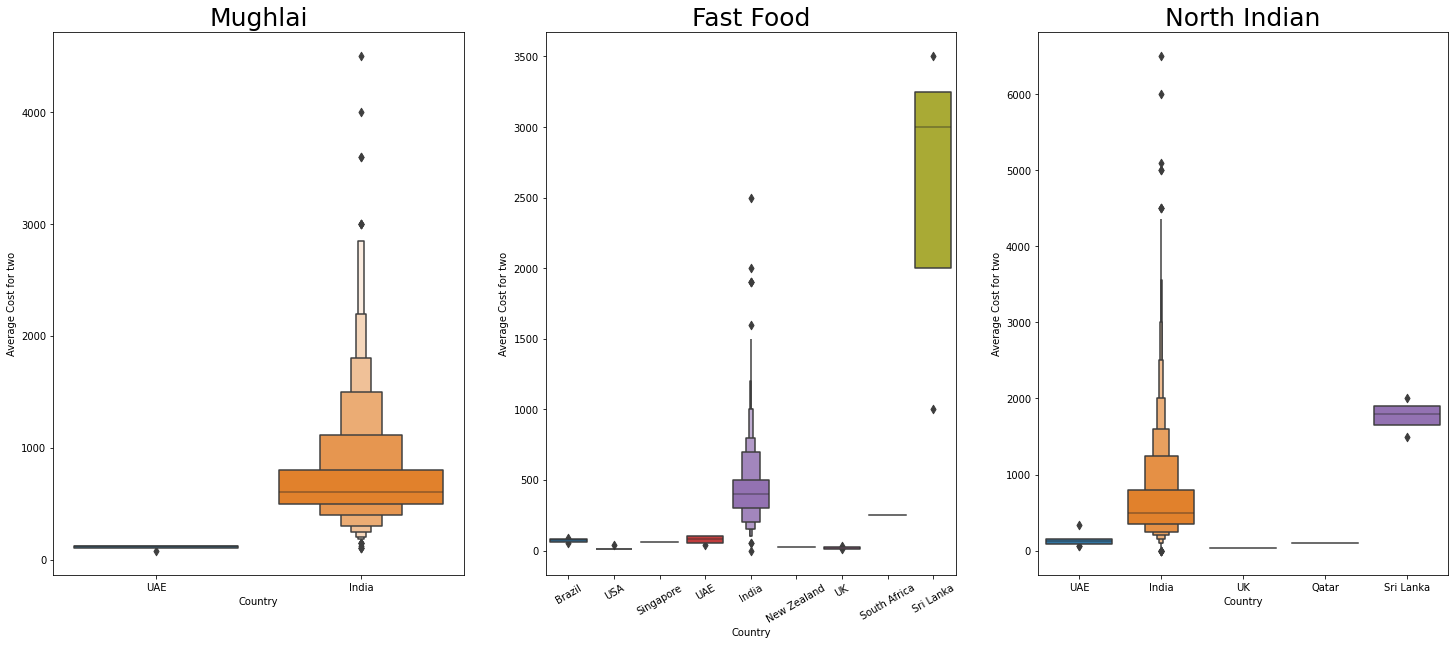

In [ ]:
fig3, (ax2_1,ax2_2)=plt.subplots(1,2)
fig3.set_size_inches(25,10)

sns.boxenplot(data=dfIt,x='Country',y='Average Cost for two',ax=ax2_1)
ax2_1.set_xticklabels(ax2_1.get_xticklabels(),rotation=30)
ax2_1.set_title("Italian",size=25)

sns.boxenplot(data=dfCh,x='Country',y='Average Cost for two',ax=ax2_2)
ax2_2.set_title("Chinese",size=25)


fig3, (ax2_3,ax2_4,ax2_5)=plt.subplots(1,3)
fig3.set_size_inches(25,10)

sns.boxenplot(data=dfMu,x='Country',y='Average Cost for two',ax=ax2_3)
ax2_3.set_title("Mughlai",size=25)

sns.boxenplot(data=dfFF,x='Country',y='Average Cost for two',ax=ax2_4)
ax2_4.set_xticklabels(ax2_4.get_xticklabels(),rotation=30)
ax2_4.set_title("Fast Food",size=25)

sns.boxenplot(data=dfNI,x='Country',y='Average Cost for two',ax=ax2_5)
ax2_5.set_title("North Indian",size=25)

#Analysing Indian data

#Question 2
1. We will analyse the Indian data only from this point.

In [ ]:
dfIndia=df.loc[df['Country']=="India"]

In [ ]:
mumDel=dfIndia.loc[ ( dfIndia['City']=="Mumbai" ) |( dfIndia['City']=="New Delhi" )]
notMumDel=dfIndia.loc[ ( dfIndia['City']!="Mumbai" ) & ( dfIndia['City']!="New Delhi" )]


In [ ]:
dfQ2=dfIndia.copy()
dfQ2['IsMumDel']="Others"



#dfQ2_data=dfQ2.loc[ ( dfIndia['City']=="Mumbai" ) |( dfIndia['City']=="New Delhi" )]

for index,row in dfQ2.iterrows():
  if row['City']=="New Delhi":
    dfQ2.at[index,"IsMumDel"]="Mumbai and Delhi"
  elif row['City']=="Mumbai":
    dfQ2.at[index,"IsMumDel"]="Mumbai and Delhi"
#sns.boxplot([mumDel['Average Cost for two'],notMumDel['Average Cost for two']])

In [ ]:
print(dfQ2.IsMumDel.value_counts())
dfQ2.info()

Mumbai and Delhi    5493
Others              3159
Name: IsMumDel, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8652 entries, 624 to 9275
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   Country               8652 non-null   object 
 3   City                  8652 non-null   object 
 4   Address               8652 non-null   object 
 5   Locality              8652 non-null   object 
 6   Locality Verbose      8652 non-null   object 
 7   Longitude             8652 non-null   float64
 8   Latitude              8652 non-null   float64
 9   Cuisines              8652 non-null   object 
 10  Average Cost for two  8652 non-null   int64  
 11  Currency              8652 non-null   object 
 12  Has Table booking     8652 non-null   object 
 13  Has Online delivery   8652 non-null   obje

## 63% of the restaurants are located in mumbai and delhi

There are only 20 restaurants in mumbai which are mentioned in this dataset. Hence, the major contribution is from New Delhi.

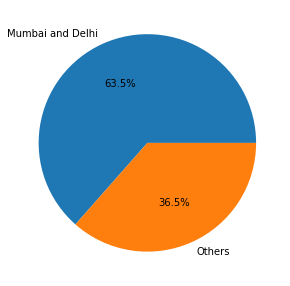

In [ ]:
fig11=plt.figure(figsize=(10,5))

ax11=plt.pie(dfQ2['IsMumDel'].value_counts(),labels=dfQ2['IsMumDel'].value_counts().index,autopct="%1.1f%%")

## The below violin plot gives us an idea of how the price varies in Mumbai and Delhi compared to the others.



Text(0, 0.5, 'Average Cost for two')

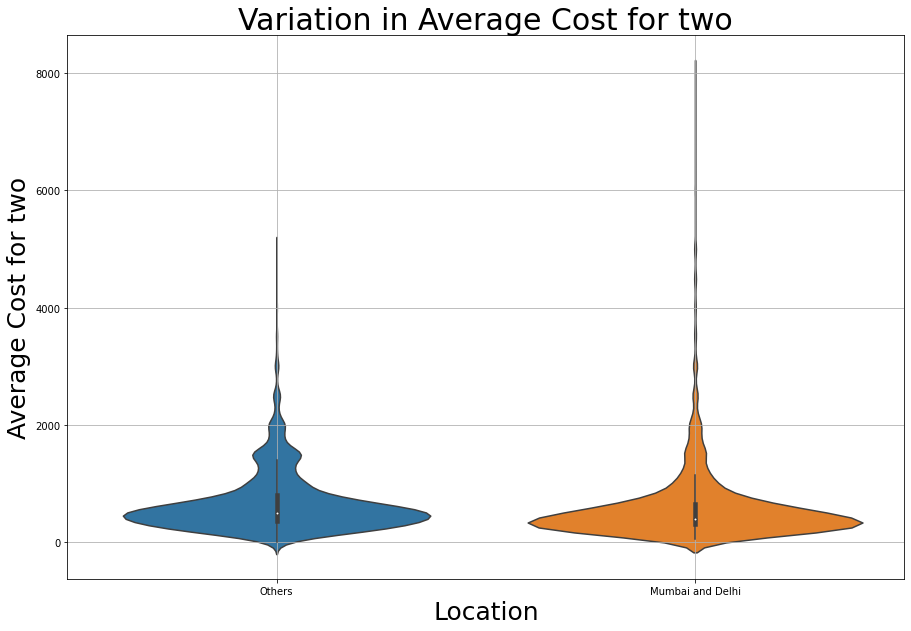

In [ ]:
fig4, ax4=plt.subplots(1,1)
fig4.set_size_inches(15,10)
sns.violinplot(data=dfQ2,x="IsMumDel",y="Average Cost for two",ax=ax4)
ax4.set_title("Variation in Average Cost for two",size=30)
ax4.grid(True)
ax4.set_xlabel("Location",size=25)
ax4.set_ylabel("Average Cost for two",size=25)

In [ ]:
cnt.head(10)

,0
North Indian,3960
Chinese,2735
Fast Food,1986
Mughlai,995
Italian,764
Bakery,745
Continental,736
Cafe,703
Desserts,653
South Indian,636


# Question 5

1. There are 43 different cities.

In [ ]:
dfIndia.City.value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Amritsar          21
Lucknow           21
Guwahati          21
Bhubaneshwar      21
Mysore            20
Kochi             20
Puducherry        20
Kanpur            20
Goa               20
Mumbai            20
Vadodara          20
Surat             20
Coimbatore        20
Vizag             20
Ranchi            20
Nashik            20
Chennai           20
Bhopal            20
Dehradun          20
Jaipur            20
Patna             20
Varanasi          20
Nagpur            20
Agra              20
Ludhiana          20
Mangalore         20
Allahabad         20
Bangalore         20
Aurangabad        20
Kolkata           20
Pune              20
Indore            20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Mohali             1
Panchkula          1
Name: City, dtype: int64

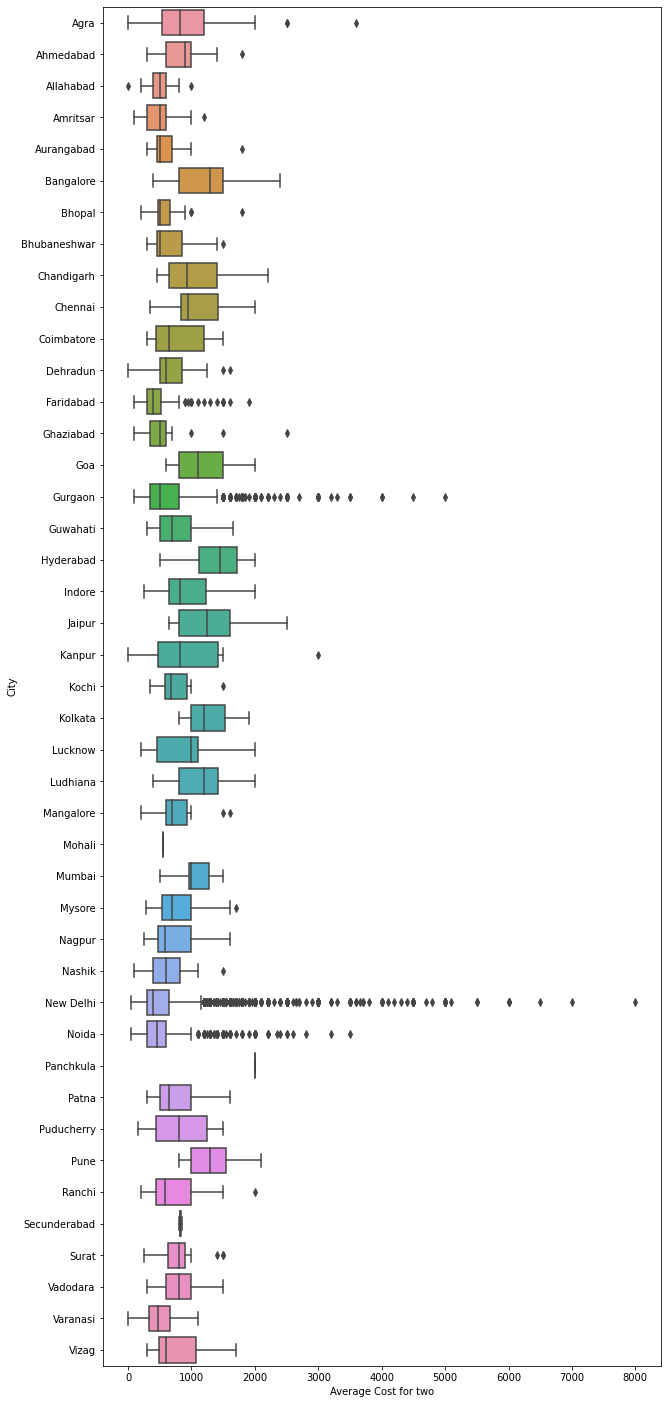

In [ ]:
fig2,ax2_1=plt.subplots(1,1)
fig2.set_size_inches(10,25)

sns.boxplot(data=dfIndia,y="City",x="Average Cost for two",ax=ax2_1)

In [ ]:
dfQ5=dfIndia[['Average Cost for two','City']]
dfQ5=dfQ5.groupby('City').mean()
dfQ5=dfQ5.sort_values(by=['Average Cost for two'])

In [ ]:
print("Top 10 most expensive cities")
dfQ5[-10:]



Top 10 most expensive cities


,Average Cost for two
City,
Mumbai,1072.500000
Chennai,1085.000000
Ludhiana,1160.000000
Goa,1175.000000
Bangalore,1232.500000
Kolkata,1272.500000
Jaipur,1310.000000
Pune,1337.500000
Hyderabad,1361.111111


Text(0, 0.5, 'Average cost for two')

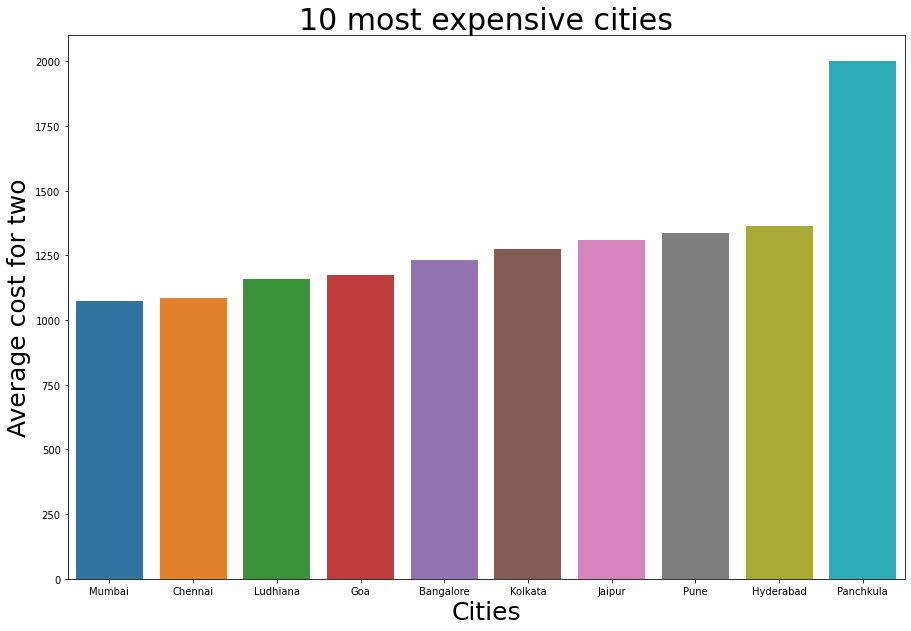

In [ ]:
fig14=plt.figure(figsize=(15,10))
ax14=sns.barplot(x=dfQ5.tail(10).index,y=dfQ5['Average Cost for two'].tail(10))
ax14.set_title("10 most expensive cities",size=30)
ax14.set_xlabel("Cities",size=25)
ax14.set_ylabel("Average cost for two",size=25)

In [ ]:
print("Top 10 least expensive cities")
dfQ5[:10]

Top 10 least expensive cities


,Average Cost for two
City,
Faridabad,447.609562
Amritsar,480.952381
Varanasi,505.000000
Allahabad,517.500000
Noida,539.490741
Mohali,550.000000
New Delhi,596.088069
Ghaziabad,602.000000
Bhopal,620.000000


Text(0, 0.5, 'Average cost for two')

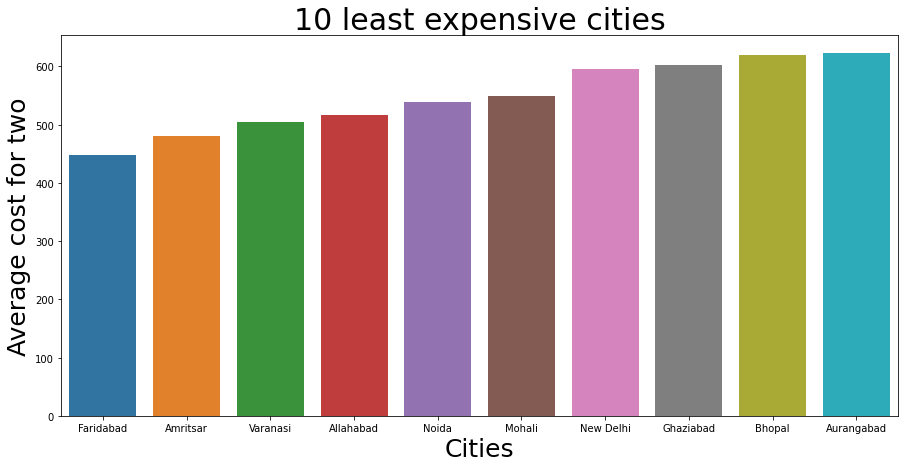

In [ ]:
fig14=plt.figure(figsize=(15,7))
ax14=sns.barplot(x=dfQ5.head(10).index,y=dfQ5['Average Cost for two'].head(10))
ax14.set_title("10 least expensive cities",size=30)
ax14.set_xlabel("Cities",size=25)
ax14.set_ylabel("Average cost for two",size=25)

## 12% allow reservation through Zomato

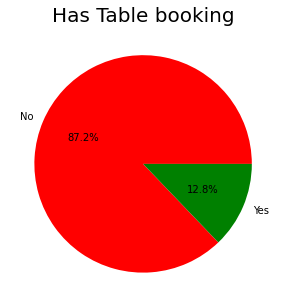

In [ ]:
fig5, ax5=plt.subplots(1,1)
fig5.set_size_inches(10,5)
ax5.set_title("Has Table booking",size=20)
ax5.pie(dfIndia['Has Table booking'].value_counts(),labels=dfIndia['Has Table booking'].value_counts().index,autopct="%1.1f%%",colors=['r','g']);

In [ ]:
dfIndiaOnlinedel=dfIndia[df['Has Online delivery']=='Yes']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



## Mean of the Average cost for 2 for the restaurants that have online delivery via Zomato

In [ ]:
print(len(dfIndiaOnlinedel))
dfIndiaOnlinedel['Average Cost for two'].mean()

2423


684.8741229880313

Text(0, 0.5, 'Average cost for two')

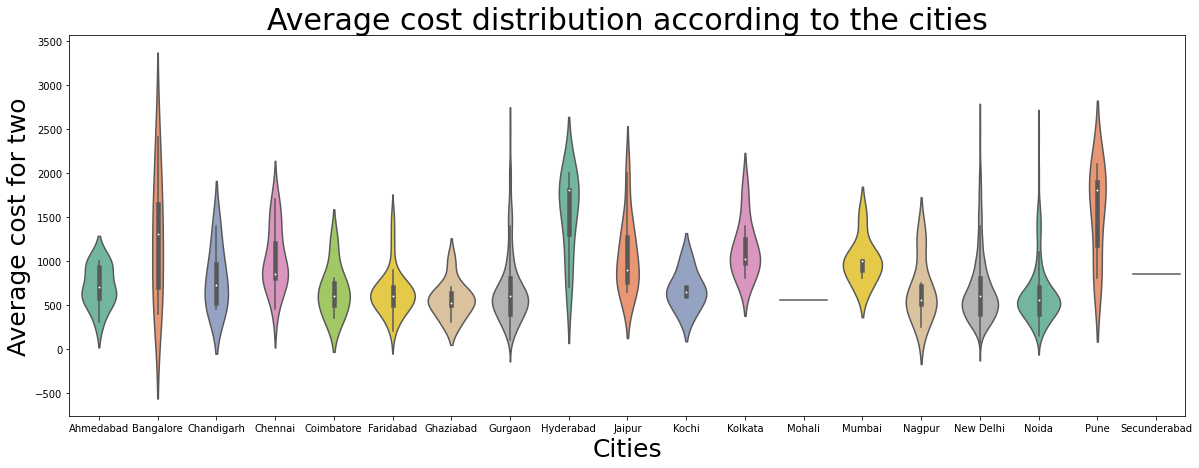

In [ ]:
fig15=plt.figure(figsize=(20,7))
ax15=sns.violinplot(x=dfIndiaOnlinedel['City'],y=dfIndiaOnlinedel['Average Cost for two'],palette='Set2')
ax15.set_title("Average cost distribution according to the cities",size=30)
ax15.set_xlabel("Cities",size=25)
ax15.set_ylabel("Average cost for two",size=25)


# Question 4
1. Let us start examining by first noting the number of values in each rating category.

In [ ]:
dfIndia['Rating text'].value_counts()

Average      3678
Not rated    2139
Good         1847
Very Good     692
Poor          180
Excellent     116
Name: Rating text, dtype: int64

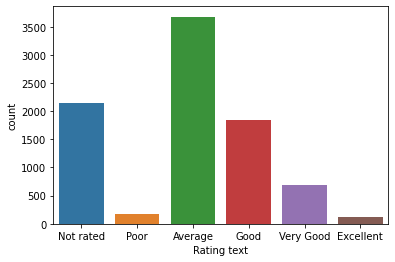

In [ ]:
sns.countplot(data=dfIndia.sort_values(by='Aggregate rating'),x="Rating text")


## As previously examined, we have a similar normal distribution for the Indian data.

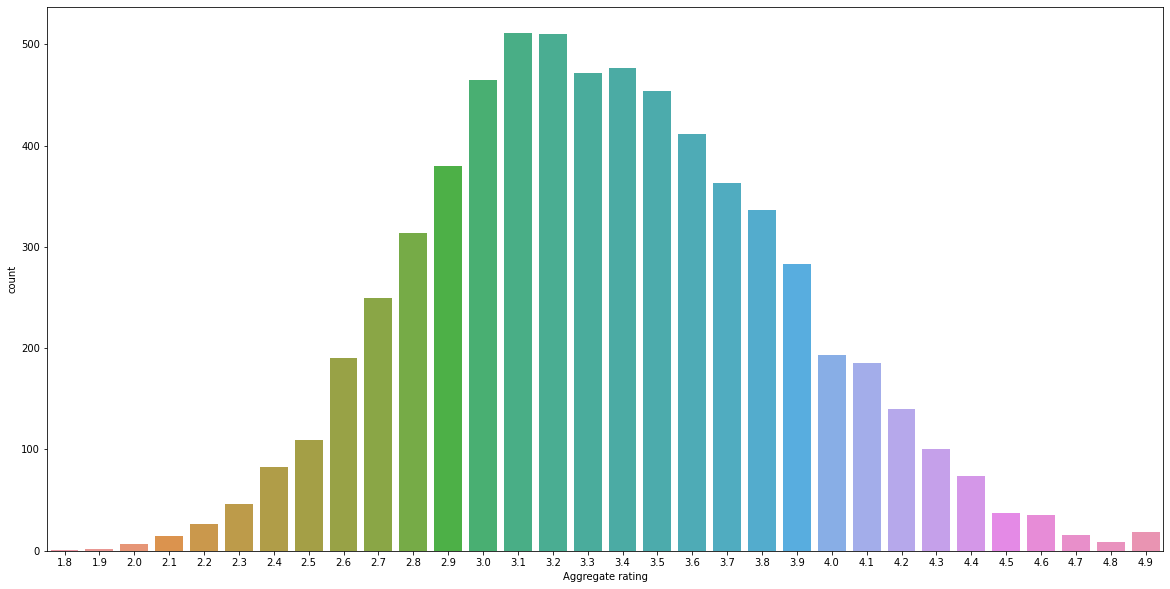

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.countplot(data=dfIndia[dfIndia['Aggregate rating']!=0],x="Aggregate rating")

## Below are the visualizations of variation of rating with rating and cost

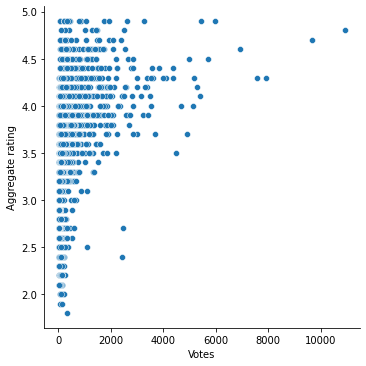

In [ ]:
sns.relplot(data=dfIndia[dfIndia['Aggregate rating']!=0],x='Votes',y='Aggregate rating')

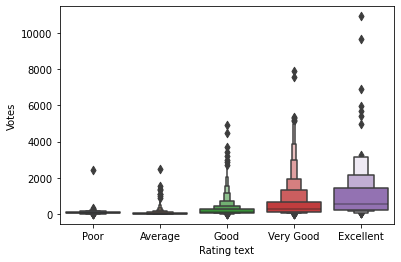

In [ ]:
sns.boxenplot(data=dfIndia[dfIndia['Aggregate rating']!=0].sort_values(by=['Aggregate rating']),x='Rating text',y='Votes')

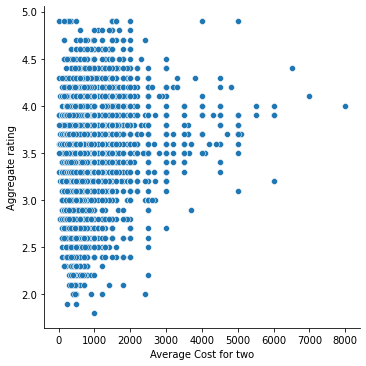

In [ ]:
sns.relplot(data=dfIndia[dfIndia['Aggregate rating']!=0],x='Average Cost for two',y='Aggregate rating')

## Expensive restaurants do show higher rating

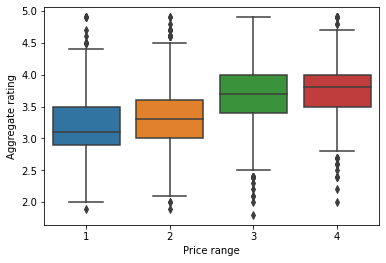

In [ ]:
sns.boxplot(data=dfIndia[dfIndia['Aggregate rating']!=0],x='Price range',y='Aggregate rating')

## Both are positive correlation values with a descent value.

In [ ]:
dfIndia['Aggregate rating'].corr(dfIndia['Average Cost for two'])

0.34417156268181925

In [ ]:
dfIndia['Aggregate rating'].corr(dfIndia['Votes'])

0.2876924089632172

#Question 3
1. We can see the top 10 most popular cuisines 

In [ ]:
cnt.head(10)

,0
North Indian,3960
Chinese,2735
Fast Food,1986
Mughlai,995
Italian,764
Bakery,745
Continental,736
Cafe,703
Desserts,653
South Indian,636


## Cuisine popularity based on number of offerings.

Text(0.5, 0, 'Cusines')

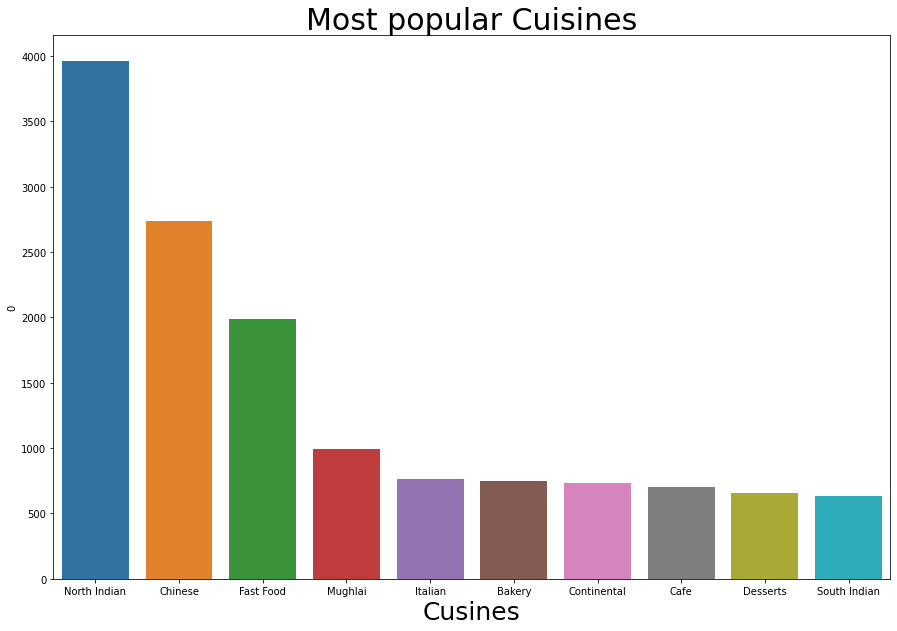

In [ ]:
fig12=plt.figure(figsize=(15,10))

ax12=sns.barplot(y=cnt[0].head(10),x=cnt[0].head(10).index)

ax12.set_title("Most popular Cuisines",size=30)
ax12.set_xlabel("Cusines",size=25)

## Cities which have the best rating

In [ ]:
dfIndiaRated=dfIndia.loc[dfIndia['Aggregate rating']!=0]

In [ ]:
dfIndiaRated=dfIndiaRated[['Aggregate rating','City']]
dfIndiaRated=dfIndiaRated.groupby('City').mean()
dfIndiaRated=dfIndiaRated.sort_values(by=['Aggregate rating'], ascending=False)

## Top 10 cities with the highest average rating

In [ ]:
dfIndiaRated.head(15)

,Aggregate rating
City,
Secunderabad,4.500000
Bangalore,4.375000
Hyderabad,4.344444
Chennai,4.315000
Mohali,4.300000
Kolkata,4.255000
Goa,4.245000
Pune,4.220000
Panchkula,4.200000


Text(0, 0.5, 'Average rating')

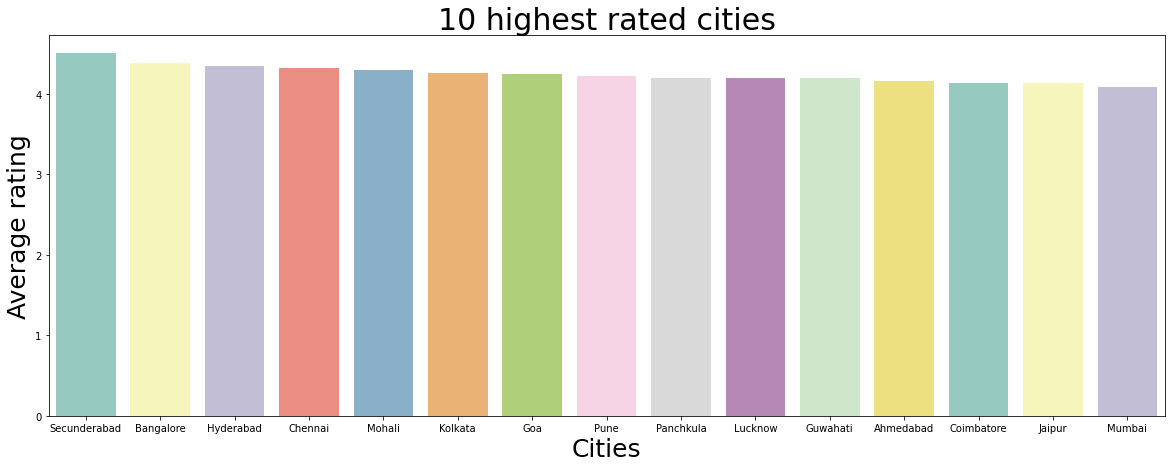

In [ ]:
fig14=plt.figure(figsize=(20,7))
ax14=sns.barplot(x=dfIndiaRated.head(15).index,y=dfIndiaRated['Aggregate rating'].head(15),palette='Set3')
ax14.set_title("10 highest rated cities",size=30)
ax14.set_xlabel("Cities",size=25)
ax14.set_ylabel("Average rating",size=25)

In [ ]:
dfIndia.describe()
#dfIndia[df['Price range']==4].describe()

,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Total_Cuisines
count,8.652000e+03,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,8.657085e+06,72.856786,26.420652,623.370319,1.721683,2.523324,137.212552,2.063569
std,8.959437e+06,18.017536,6.976576,595.676124,0.852544,1.510986,428.039513,1.099754
min,5.300000e+01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,3.007402e+05,77.098797,28.491425,300.000000,1.000000,2.100000,4.000000,1.000000
50%,2.200006e+06,77.203468,28.569869,450.000000,2.000000,3.100000,24.000000,2.000000
75%,1.836120e+07,77.285356,28.637857,700.000000,2.000000,3.600000,100.000000,3.000000
max,1.850065e+07,91.806493,35.000000,8000.000000,4.000000,4.900000,10934.000000,8.000000


In [ ]:
lst_cuisine_ex = set()
Cnt_cuisine_ex = Counter()
dfIndia_ex=dfIndia['Cuisines']
for cu_lst in dfIndia[dfIndia['Price range']==4]['Cuisines']:
    cu_lst = cu_lst.split(',')
    lst_cuisine.update([cu.strip() for cu in cu_lst])
    for cu in cu_lst:
        Cnt_cuisine_ex[cu.strip()] += 1

cnt_ex = pd.DataFrame.from_dict(Cnt_cuisine_ex, orient = 'index')
cnt_ex.sort_values(0, ascending = False, inplace = True)


In [ ]:
cnt_ex

,0
North Indian,198
Continental,127
Chinese,108
Italian,98
European,52
Finger Food,49
Asian,35
Mughlai,32
Thai,32
American,27


## We have 33 cities in India which have high price range(4) and and dining services. (No online deliver). The point plot helps us to see the trend

In [ ]:
dfOut=dfIndia[(dfIndia['Price range']==4) & ((dfIndia['Has Online delivery']=='No'))]
dfOut=dfOut[['Average Cost for two','City']]
dfOut=dfOut.groupby('City').mean()
dfOut=dfOut.sort_values(by=['Average Cost for two'])

dfOut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Allahabad to New Delhi
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  33 non-null     float64
dtypes: float64(1)
memory usage: 528.0+ bytes


In [ ]:
dfOut.tail(10)

,Average Cost for two
City,
Panchkula,2000.000000
Bangalore,2000.000000
Ranchi,2000.000000
Chandigarh,2200.000000
Noida,2329.411765
Jaipur,2400.000000
Agra,2420.000000
Ghaziabad,2500.000000
Gurgaon,2614.285714


Text(0.5, 1.0, 'Expensive Dine-out')

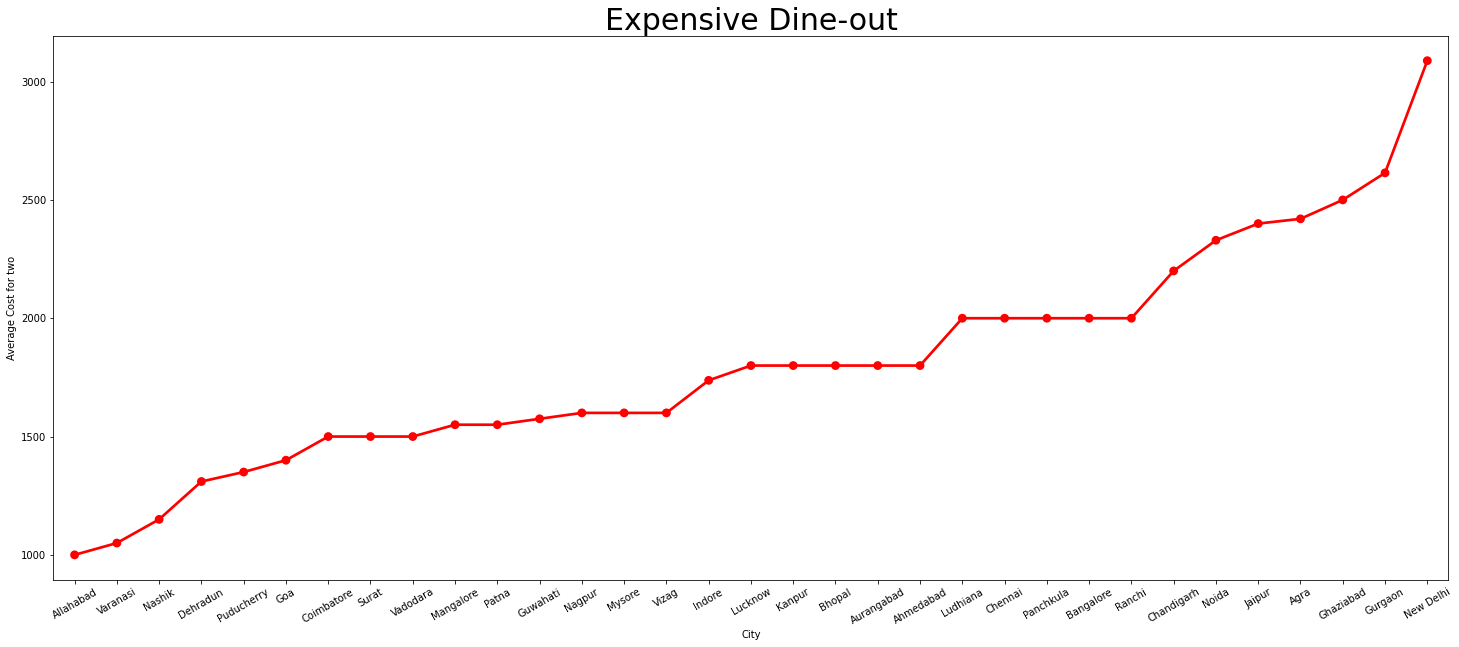

In [ ]:
fig6, ax6_1=plt.subplots(1,1)
fig6.set_size_inches(25,10)
sns.pointplot(x=dfOut.index,y=dfOut['Average Cost for two'],ax=ax6_1,color='r')
ax6_1.set_xticklabels(ax6_1.get_xticklabels(),rotation=30)
ax6_1.set_title("Expensive Dine-out",size=30)


## The below wordcloud gives us an idea of the cuisines which are served in restaurants with the highest price range.

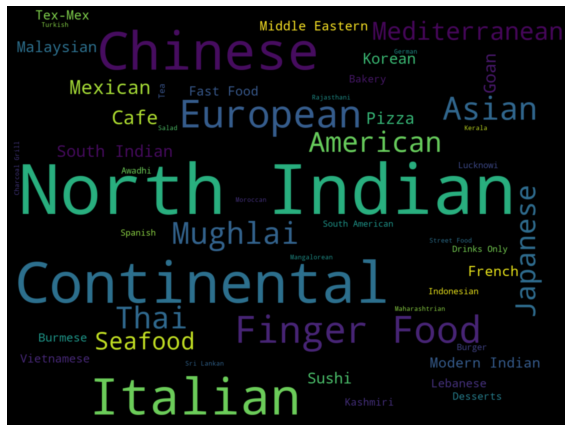

In [ ]:
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5,background_color='black',stopwords= stopwords).generate_from_frequencies(Cnt_cuisine_ex))

fig = plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud,interpolation="gaussian")
plt.axis('off')
plt.show()

#Predicting rating category using classification algorithms.

## Data preparation

In [ ]:
dfIndiaMl=dfIndia[['Average Cost for two','Votes','Rating text','Price range','Total_Cuisines','Has Online delivery',
                   'Has Table booking','Is delivering now','Aggregate rating']]
dfIndiaMl=dfIndiaMl[dfIndiaMl['Aggregate rating']!=0]
len(dfIndiaMl)
X=dfIndiaMl[['Average Cost for two','Votes','Price range']]
Y=dfIndiaMl['Aggregate rating']

In [ ]:
dfIndiaMl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 624 to 9275
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  6513 non-null   int64  
 1   Votes                 6513 non-null   int64  
 2   Rating text           6513 non-null   object 
 3   Price range           6513 non-null   int64  
 4   Total_Cuisines        6513 non-null   int64  
 5   Has Online delivery   6513 non-null   object 
 6   Has Table booking     6513 non-null   object 
 7   Is delivering now     6513 non-null   object 
 8   Aggregate rating      6513 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 508.8+ KB


In [ ]:
dfIndiaMl['Has Online delivery']=dfIndiaMl['Has Online delivery'].map({'Yes':1,'No':0})
dfIndiaMl['Has Table booking']=dfIndiaMl['Has Table booking'].map({'Yes':1,'No':0})
dfIndiaMl['Is delivering now']=dfIndiaMl['Is delivering now'].map({'Yes':1,'No':0})
dfIndiaMl['Rating text']=dfIndiaMl['Rating text'].map({'Poor':1,'Average':2,'Good':3,'Very Good':4,'Excellent':5})
#dfIndiaMl['Rating text']=dfIndiaMl['Rating text'].astype('category')

In [ ]:
dfIndiaMl=dfIndiaMl.drop('Aggregate rating',axis=1)
dfIndiaMl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 624 to 9275
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Average Cost for two  6513 non-null   int64
 1   Votes                 6513 non-null   int64
 2   Rating text           6513 non-null   int64
 3   Price range           6513 non-null   int64
 4   Total_Cuisines        6513 non-null   int64
 5   Has Online delivery   6513 non-null   int64
 6   Has Table booking     6513 non-null   int64
 7   Is delivering now     6513 non-null   int64
dtypes: int64(8)
memory usage: 457.9 KB


## The below table gives us information regarding the categorization of the ratings.

In [ ]:
dfIndiaCheck=dfIndia[['Aggregate rating','Rating text']]
#print(dfIndiaCheck['Aggregate rating'].value_counts())
dfIndiaCheck=dfIndiaCheck.drop_duplicates()
dfIndiaCheck=dfIndiaCheck.reset_index(drop=True)
dfIndiaCheck=dfIndiaCheck.sort_values(by='Aggregate rating')
dfIndiaCheck
#dfIndiaCheck=dfIndiaCheck.sort_values(by=['Aggregate rating'])

,Aggregate rating,Rating text
22,0.0,Not rated
28,1.8,Poor
32,1.9,Poor
30,2.0,Poor
23,2.1,Poor
29,2.2,Poor
31,2.3,Poor
25,2.4,Poor
27,2.5,Average
26,2.6,Average


In [ ]:
X=dfIndiaMl.loc[: , dfIndiaMl.columns!='Rating text']
Y=dfIndiaMl['Rating text']

In [ ]:
X

,Average Cost for two,Votes,Price range,Total_Cuisines,Has Online delivery,Has Table booking,Is delivering now
624,850,140,3,2,0,0,0
625,700,71,2,2,0,0,0
626,500,94,2,1,0,0,0
627,400,87,2,1,0,0,0
628,1000,177,3,3,0,0,0
...,...,...,...,...,...,...,...
9271,600,193,2,5,0,0,0
9272,400,85,2,3,0,0,0
9273,600,172,2,3,0,0,0
9274,1500,74,4,4,0,0,0


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [ ]:
scaler=StandardScaler()

X=scaler.fit_transform(X)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.8)
#print(x_train)
log_reg=LogisticRegression(C=1)
log_reg.fit(x_train,y_train)

y_pred=log_reg.predict(x_test)

In [ ]:
y_pred

array([2, 2, 3, ..., 2, 2, 2])

In [ ]:
print(classification_report(y_test,y_pred))
#print(r2_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       146
           2       0.73      0.91      0.81      2961
           3       0.51      0.42      0.46      1469
           4       0.44      0.21      0.29       550
           5       0.20      0.01      0.02        85

    accuracy                           0.66      5211
   macro avg       0.38      0.31      0.32      5211
weighted avg       0.61      0.66      0.62      5211



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
nn_model=MLPClassifier()
nn_model.fit(x_train,y_train)

y_pred_new=nn_model.predict(x_test)

print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       146
           2       0.77      0.88      0.82      2961
           3       0.51      0.52      0.52      1469
           4       0.45      0.26      0.33       550
           5       0.07      0.02      0.04        85

    accuracy                           0.67      5211
   macro avg       0.36      0.34      0.34      5211
weighted avg       0.63      0.67      0.65      5211



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

